# Compare grids of gcmx and 60km vorticity@850 and pr

In [15]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

import ml_downscaling_emulator as mlde
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid, precip_cmap, precip_norm

In [42]:
DOMAIN="birmingham"
FREQUENCY="day"
YEAR=1981

def open_ds(resolution, variable):
    ds_meta = mlde.UKCPDatasetMetadata(os.getenv("MOOSE_DERIVED_DATA"), resolution=resolution, variable=variable, frequency=FREQUENCY, domain=DOMAIN)
    try:
        ds = xr.open_dataset(ds_meta.filepath(YEAR)).isel(time=0)
    except FileNotFoundError:
        return None
    return ds

In [43]:
RESOLUTIONS = [
    "2.2km-coarsened-gcm-2.2km-coarsened-4x",
    "60km-2.2km-coarsened-4x"
]
VARIABLES=["vorticity850", "pr"]

datasets = {var: {res: open_ds(res, var) for res in RESOLUTIONS} for var in VARIABLES}

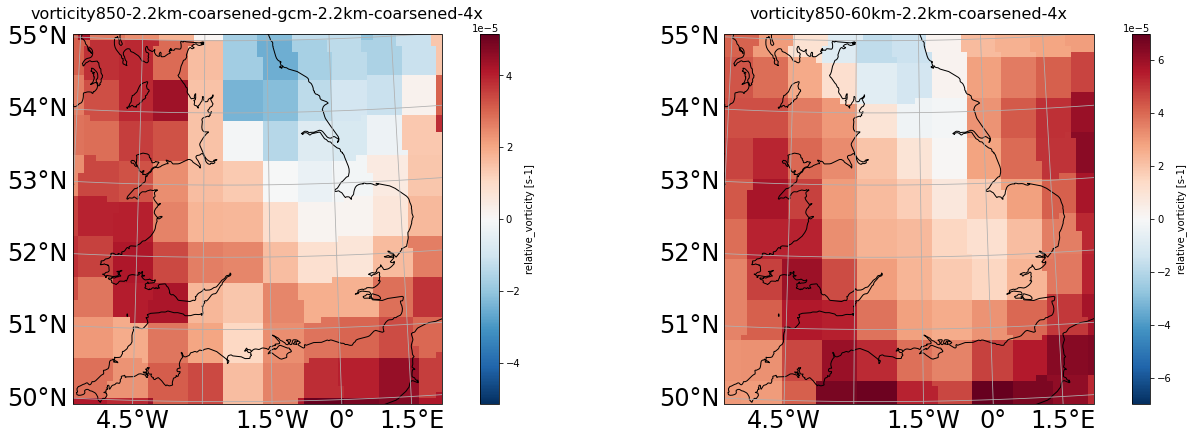

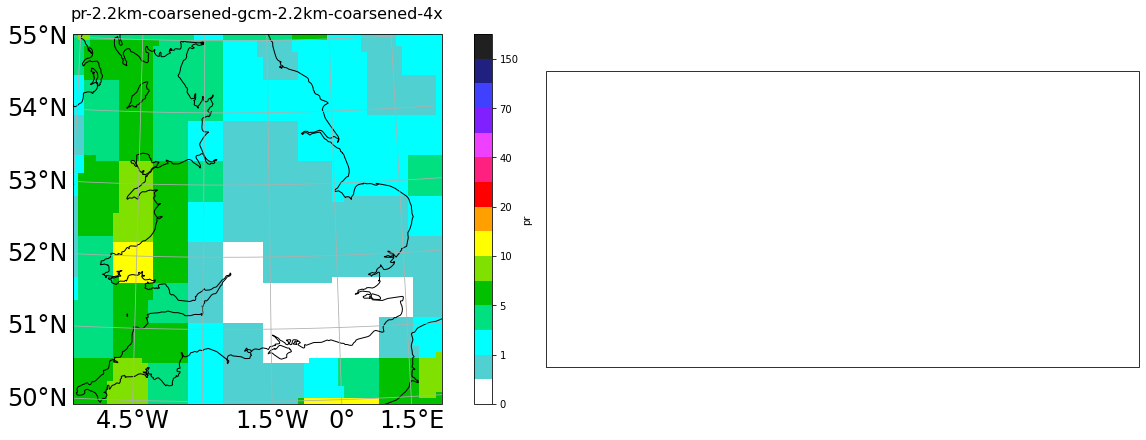

In [ ]:
var = "vorticity850"
fig, axd = plt.subplot_mosaic([RESOLUTIONS], figsize=(18, 6), constrained_layout=True, subplot_kw={'projection': cp_model_rotated_pole})
for res in RESOLUTIONS: 
    ax = axd[res]
    plot_grid(datasets[var][res][var], ax=ax, center=0, add_colorbar=True, style=None, title=f"{var}-{res}")

var = "pr"
fig, axd = plt.subplot_mosaic([RESOLUTIONS], figsize=(18, 6), constrained_layout=True, subplot_kw={'projection': cp_model_rotated_pole})
for res in RESOLUTIONS: 
    ax = axd[res]
    ds = datasets[var][res]
    if ds is not None:
        plot_grid(ds[var]*3600*24, ax=ax, add_colorbar=True, style="precip", title=f"{var}-{res}")

The hi-res grid this data is shown on is the same.
**However, can see that the coarse grid of underlying data are a bit offset from each other** even though they should be the same